In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:/Belajar DS/Rakamin JAP/Mini Project 4/Clicked Ads Dataset.csv')
df.columns = df.columns.str.lower()
df.rename(columns = {'unnamed: 0':'index',
                    'male':'gender',
                    'daily time spent on site':'daily_time_spent_on_site',
                    'area income':'area_income',
                    'daily internet usage': 'daily_internet_usage',
                    'clicked on ad':'clicked_on_ad'}, inplace = True)
df.sample(5)

,index,daily_time_spent_on_site,age,area_income,daily_internet_usage,gender,timestamp,clicked_on_ad,city,province,category
123,123,37.75,36,248267600.0,225.24,Perempuan,2/26/2016 19:48,Yes,Surabaya,Jawa Timur,Furniture
583,583,68.60,33,479142580.0,135.08,Perempuan,2/17/2016 18:50,Yes,Surabaya,Jawa Timur,Health
691,691,87.16,37,NaN,231.95,Laki-Laki,3/16/2016 20:33,No,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,Fashion
412,412,68.82,20,270264400.0,205.64,Laki-Laki,7/11/2016 15:45,No,Surabaya,Jawa Timur,Finance
790,790,36.98,31,276867430.0,167.87,Laki-Laki,3/17/2016 6:25,Yes,Palembang,Sumatra Selatan,Finance


In [26]:
df_coba=df.sample(100)
df_coba.reset_index()
df_coba['clicked_on_ad'].value_counts()

Yes    52
No     48
Name: clicked_on_ad, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1000 non-null   int64  
 1   daily_time_spent_on_site  987 non-null    float64
 2   age                       1000 non-null   int64  
 3   area_income               987 non-null    float64
 4   daily_internet_usage      989 non-null    float64
 5   gender                    997 non-null    object 
 6   timestamp                 1000 non-null   object 
 7   clicked_on_ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


tidak ada yang aneh, semua tipe data sudah sesuai/normal

In [4]:
df.describe()

,index,daily_time_spent_on_site,age,area_income,daily_internet_usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


kolom/feature area income punya persebaran value yang cukup luas dari xxxxxxx sampai xxxxxxx

In [5]:
# Membagi data type menjadi numerikal dan kategorikal untuk memudahkan EDA
numerical = [column for column in df.columns if (df[column].dtype=='int64')|(df[column].dtype=='float64')]
categorical = [column for column in df.columns if (df[column].dtype=='object')]

In [6]:
numerical

['index',
 'daily_time_spent_on_site',
 'age',
 'area_income',
 'daily_internet_usage']

In [7]:
categorical

['gender', 'timestamp', 'clicked_on_ad', 'city', 'province', 'category']

## **EDA**

### **Univariate Analysis 1**

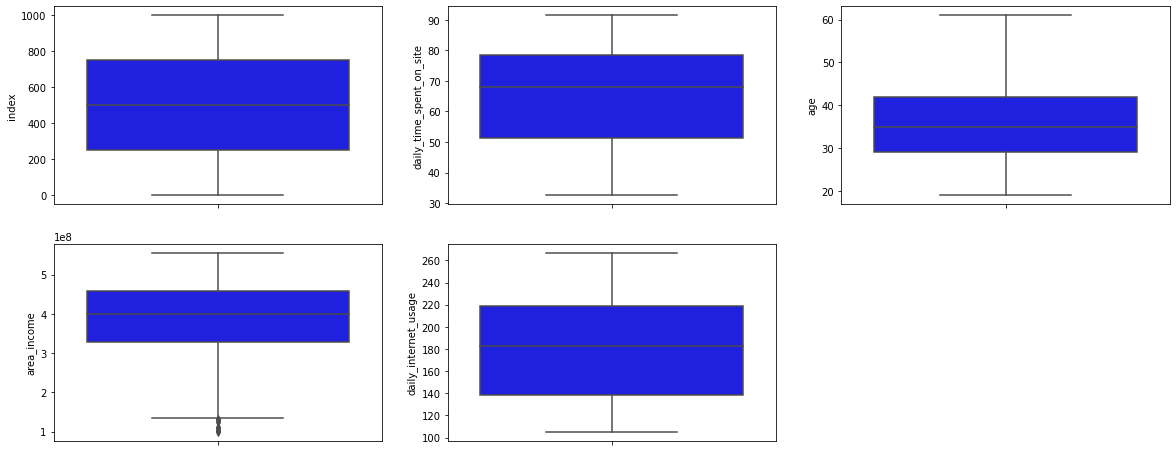

In [8]:
features = numerical
plt.figure(figsize=(20, 8))
for i in range(0, len(features)):
        plt.subplot(2, 3, i+1)
        sns.boxplot(y=df[features[i]], color='blue', orient='v')

Insight:
Berdasarkan visualisasi boxplot feature numerikal yang ada dalam dataset dapat diketahui bahwa hampir semua feature terbebas dari outlier. Hanya terdapat satu feature yang memiliki outlier yakni area income. Untuk feature area_income ini akan diberi penanganan dengan metode IQR (Interquartile Range).

### **Univariate Analysis 2**

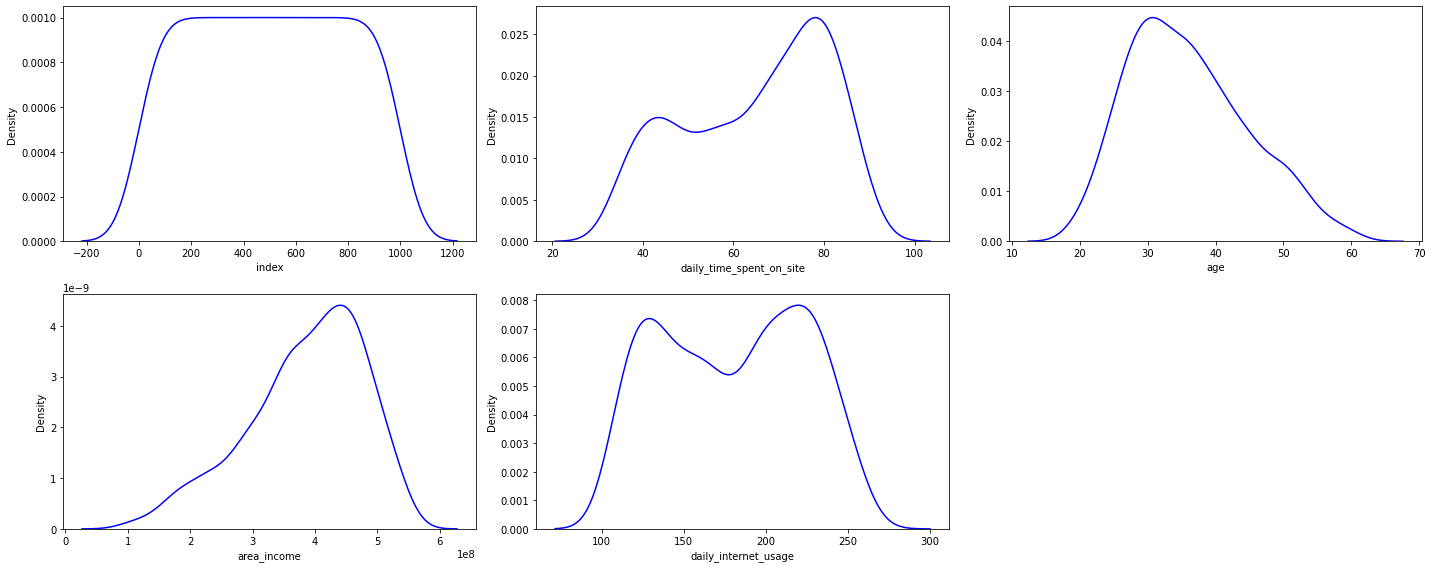

In [9]:
features = numerical
plt.figure(figsize=(20, 8))
for i in range(0, len(features)):
   
        plt.subplot(2, 3, i+1)
        sns.kdeplot(x=df[features[i]], color='blue')
        plt.xlabel(features[i])
        plt.tight_layout()

Insight:
Berdasarkan visualisasi distribusi plot diatas, terlihat bahwa semua feature numerikal yang ada memiliki distribusi yang cukup normal (mendekati normal) atau tidak ada yang terlalu terdistribusi positif atau negatif yang ekstrem (Right/left Skewness).

### **Univariate Analysis 3**

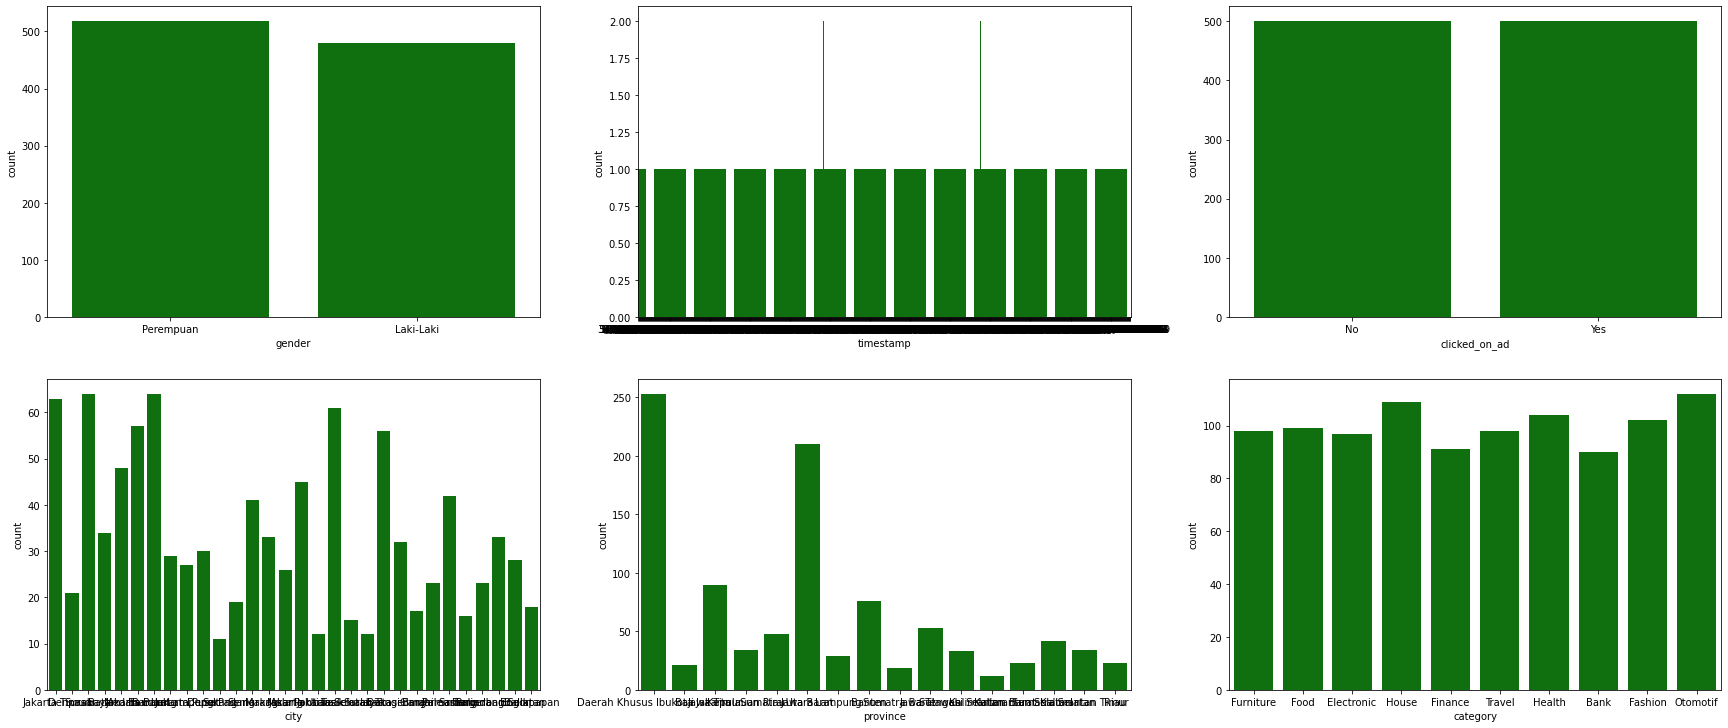

In [10]:
features = categorical
plt.figure(figsize=(30,40))
for i in range(0, len(features)):
        plt.subplot(6,3 , i+1)
        sns.countplot(x=df[features[i]], color='green')

Dari visualisasi bar plot diatas, beberapa insight yang didapat dari feature kategorikal yang ada pada dataset adalah sebagai berikut.
1. Mayoritas customer berjenis kelamin perempuan
2. Tidak terdapat perbedaan antara jumlah customer yang mengklik pada iklan dan yang tidak mengklik pada iklan 
3. Mayoritas customer berdomisili di kota Surabaya namun apabila dilihat dari tingkat provinsi maka domisili customer paling dominan adalah DKI Jakarta

<AxesSubplot:xlabel='city', ylabel='count'>

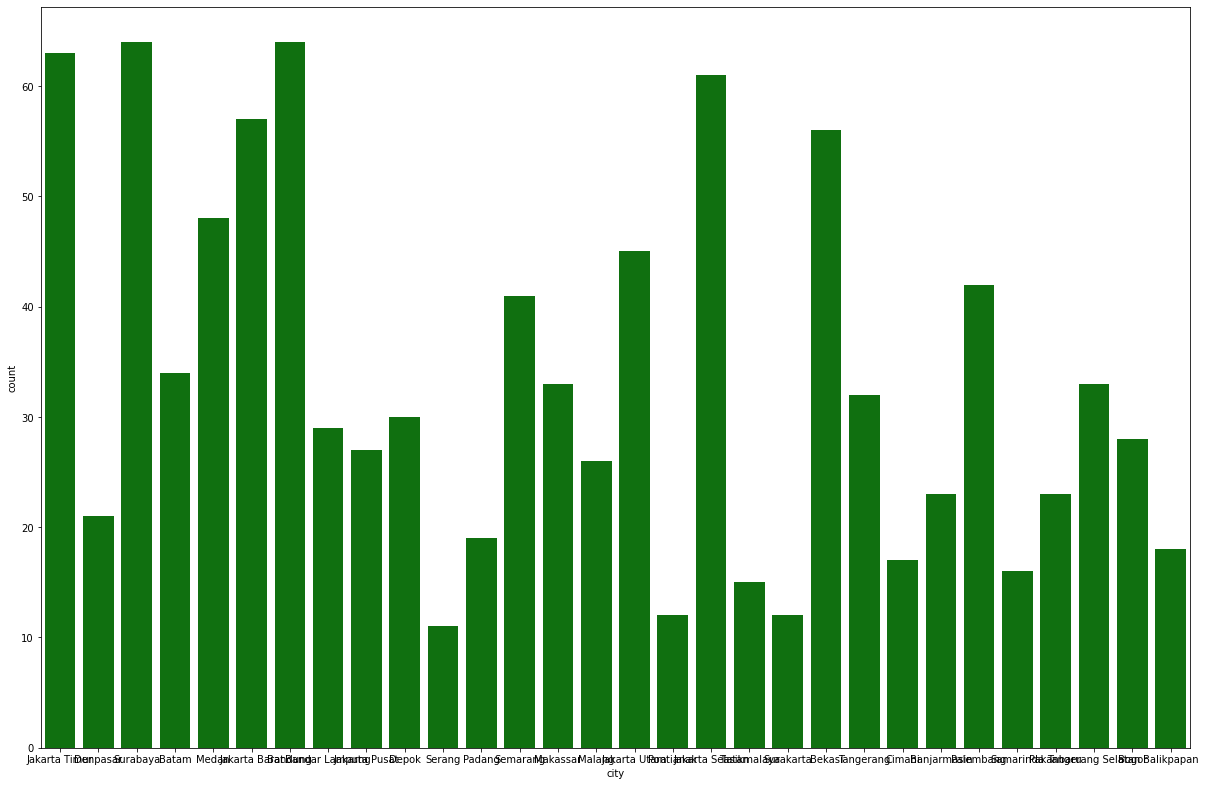

In [11]:
plt.figure(figsize=(70,30))
plt.subplot(2,3 , i+1)
sns.countplot(x=df['city'], color='green')

<AxesSubplot:xlabel='province', ylabel='count'>

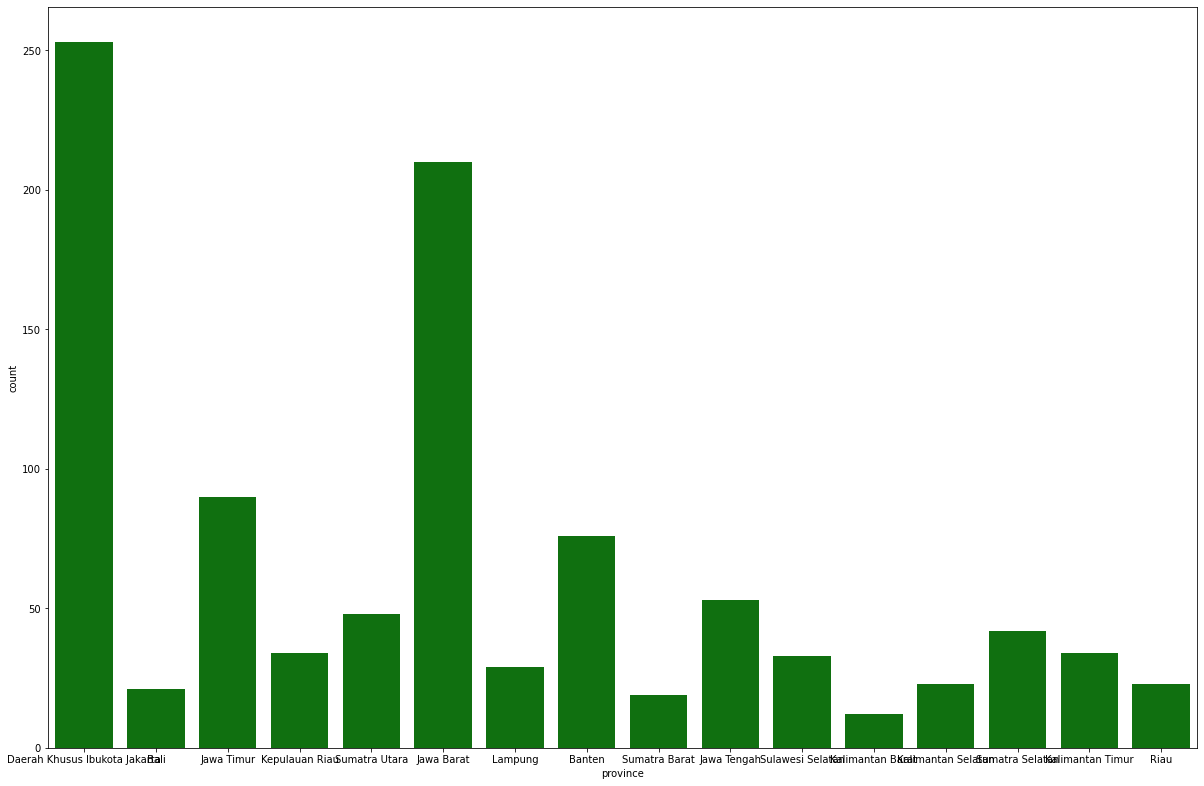

In [12]:
plt.figure(figsize=(70,30))
plt.subplot(2,3 , i+1)
sns.countplot(x=df['province'], color='green')

### **Bivariate Analysis**

In [13]:
df['customer_age_group']= np.where((df['age'] >= 0) & (df['age'] < 15),'Children (0-14)',
                             np.where((df['age'] >= 15) & (df['age'] < 25),'Youth (15-24)',
                                      np.where((df['age'] >= 25) & (df['age'] < 45),'Young Adults (25-45)',                                               
                                               np.where((df['age'] >= 45) & (df['age'] < 65),'Middle-aged Adults (45-65)','Old-aged Adults (>65)'))))

In [14]:
df_bi=df[['daily_time_spent_on_site','customer_age_group', 'daily_internet_usage', 'clicked_on_ad']]
df_bi=df_bi.groupby(['clicked_on_ad','customer_age_group']).agg({ 'daily_time_spent_on_site' : ['mean'],
                                     'daily_internet_usage' : ['mean']}).reset_index()

df_bi.columns=['clicked_on_ad','customer_age_group','avg_daily_time_spent','avg_daily_internet_usage']
df_bi

,clicked_on_ad,customer_age_group,avg_daily_time_spent,avg_daily_internet_usage
0,No,Middle-aged Adults (45-65),78.027059,225.595000
1,No,Young Adults (25-45),77.466508,215.779953
2,No,Youth (15-24),71.106296,201.527885
3,Yes,Middle-aged Adults (45-65),53.125476,147.188059
4,Yes,Young Adults (25-45),52.664742,143.337152
5,Yes,Youth (15-24),62.040588,163.324706


Text(0, 0.5, 'Average Daily Time Spent on Site')

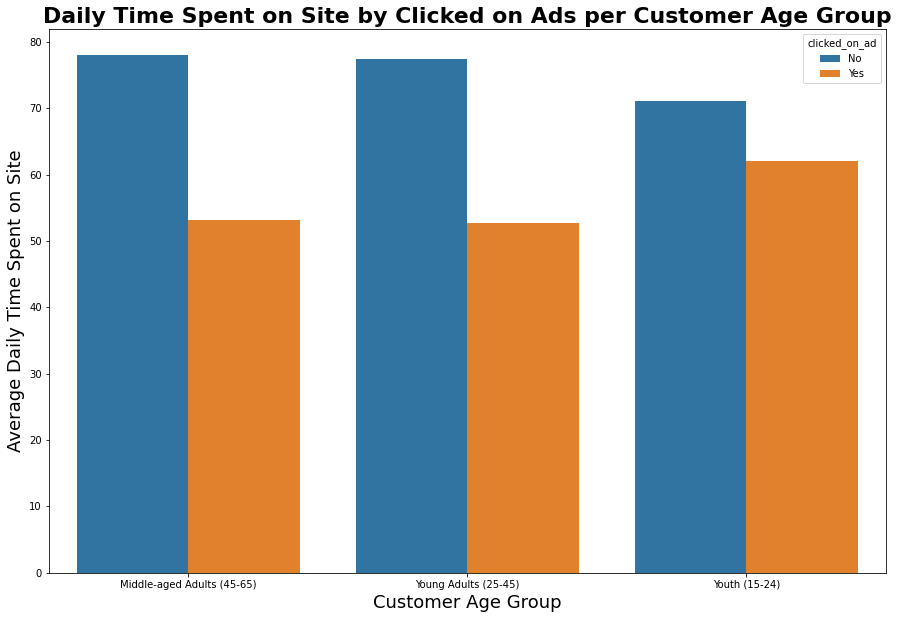

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x='customer_age_group', y='avg_daily_time_spent', hue='clicked_on_ad', data=df_bi) 
plt.title('Daily Time Spent on Site by Clicked on Ads per Customer Age Group', fontsize=22, fontweight='bold')

plt.xlabel('Customer Age Group', fontsize=18)
plt.ylabel('Average Daily Time Spent on Site', fontsize=18)

Insight:
1. Persentase customer yang menklik iklan lebih banyak pada customer dengan rentang umur 15-24 tahun (Youth)
2. Semakin lama customer menghabiskan waktunya pada situs maka tingkat kemungkinan customer akan mengklik pada iklan juga akan semakin kecil

Text(0, 0.5, 'Average Daily Internet Usage')

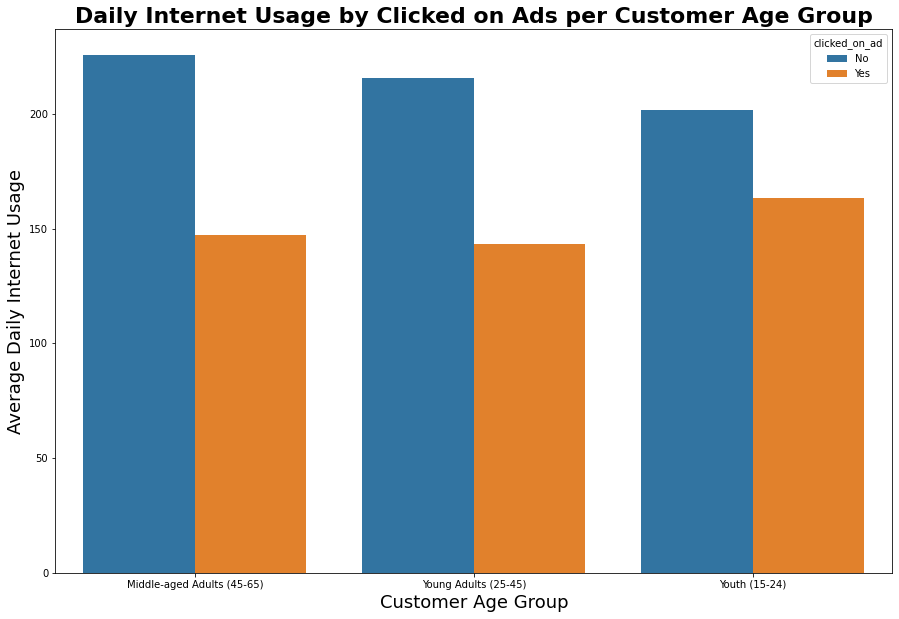

In [16]:
plt.figure(figsize=(15,10))
sns.barplot(x='customer_age_group', y='avg_daily_internet_usage', hue='clicked_on_ad', data=df_bi) 
plt.title('Daily Internet Usage by Clicked on Ads per Customer Age Group', fontsize=22, fontweight='bold')

plt.xlabel('Customer Age Group', fontsize=18)
plt.ylabel('Average Daily Internet Usage', fontsize=18)

Insight:
1. Dari dataset ini kita mendapati bahwa customer yang lebih banyak menghabiskan waktunya menggunakan internet akan berpeluang lebih tinggi untuk tidak mengklik pada iklan
2. Persentase customer yang menklik iklan lebih banyak pada customer dengan rentang umur 15-24 tahun (Youth)

### **Multivariate Analysis**

<AxesSubplot:>

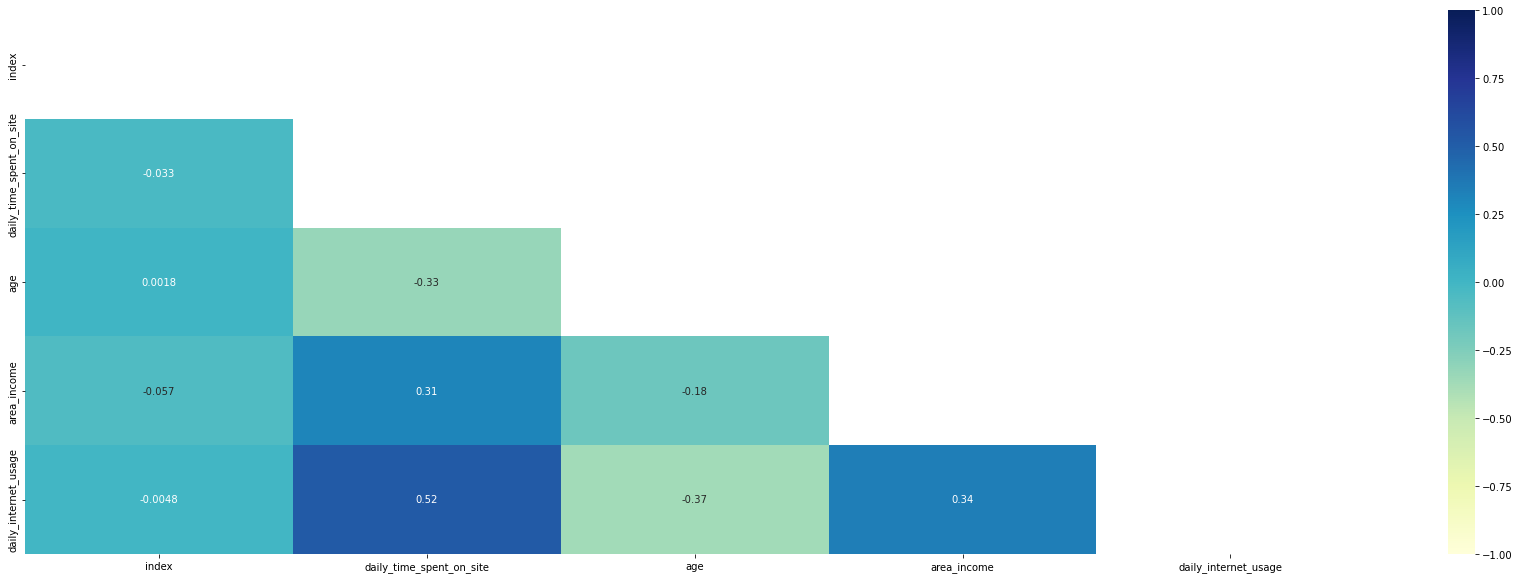

In [17]:
plt.figure(figsize=(30, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

Dari visualisasi berupa Correlation Heat Map diatas didapati bahwa tidak terdapat feature yang memiliki korelasi yang kuat atau positif dengan nilai korelasi diatas 0.7. Nilai korelasi feature yang paling mendekati dengan 0.7 yaitu berada diantara feature daily_time_spent_on_site dengan feature daily_internet_usage dengan nilai korelasi 0.5. Hal ini menandakan bahwa semakin lama customer menghabiskan waktunya pada website maka semakin lama pula penggunaan internet customer tersebut.

## **Data Pre-Processing**

In [18]:
df_clean=df.copy()
df_clean

,index,daily_time_spent_on_site,age,area_income,daily_internet_usage,gender,timestamp,clicked_on_ad,city,province,category,customer_age_group
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,Young Adults (25-45)
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food,Young Adults (25-45)
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic,Young Adults (25-45)
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House,Young Adults (25-45)
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance,Young Adults (25-45)
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance,Young Adults (25-45)
996,996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic,Middle-aged Adults (45-65)
997,997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel,Middle-aged Adults (45-65)
998,998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank,Youth (15-24)


### Missing Value

In [19]:
df_clean.isnull().mean() * 100

index                       0.0
daily_time_spent_on_site    1.3
age                         0.0
area_income                 1.3
daily_internet_usage        1.1
gender                      0.3
timestamp                   0.0
clicked_on_ad               0.0
city                        0.0
province                    0.0
category                    0.0
customer_age_group          0.0
dtype: float64

Treatment:
1. Untuk feature dengan persentase missing value diatas 0 dan dibawah 1 maka row yang memiliki missing value tersebut akan didrop 
2. Untuk feature dengan persentase missing value diatas 1 akan diisi dengan metode interpolation

In [20]:
df_clean.dropna(subset=['gender'], inplace=True)

In [21]:
##Isi dengan modus

In [22]:
##df_clean['daily time spent on site'].fillna(df_clean['daily time spent on site'].mode()[0], inplace = True)
##df_clean['area income'].fillna(df_clean['area income'].mode()[0], inplace = True)
##df_clean['daily internet usage'].fillna(df_clean['daily internet usage'].mode()[0], inplace = True)

isi dengan interpolation (metode pengisian missing value yang tidak merubah sebaran data)

In [23]:
df_clean.interpolate(method ='linear', limit_direction ='both',inplace=True)

In [24]:
df_clean.isnull().mean() * 100

index                       0.0
daily_time_spent_on_site    0.0
age                         0.0
area_income                 0.0
daily_internet_usage        0.0
gender                      0.0
timestamp                   0.0
clicked_on_ad               0.0
city                        0.0
province                    0.0
category                    0.0
customer_age_group          0.0
dtype: float64

### Duplicated Value

In [25]:
df_clean.duplicated().sum()

0

### Extract Timestamp

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     997 non-null    int64  
 1   daily_time_spent_on_site  997 non-null    float64
 2   age                       997 non-null    int64  
 3   area_income               997 non-null    float64
 4   daily_internet_usage      997 non-null    float64
 5   gender                    997 non-null    object 
 6   timestamp                 997 non-null    object 
 7   clicked_on_ad             997 non-null    object 
 8   city                      997 non-null    object 
 9   province                  997 non-null    object 
 10  category                  997 non-null    object 
 11  customer_age_group        997 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 101.3+ KB


In [27]:
df_clean['timestamp']=pd.to_datetime(df['timestamp'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     997 non-null    int64         
 1   daily_time_spent_on_site  997 non-null    float64       
 2   age                       997 non-null    int64         
 3   area_income               997 non-null    float64       
 4   daily_internet_usage      997 non-null    float64       
 5   gender                    997 non-null    object        
 6   timestamp                 997 non-null    datetime64[ns]
 7   clicked_on_ad             997 non-null    object        
 8   city                      997 non-null    object        
 9   province                  997 non-null    object        
 10  category                  997 non-null    object        
 11  customer_age_group        997 non-null    object        
dtypes: datetime64[ns](1), 

In [28]:
df_clean['timestamp']

0     2016-03-27 00:53:00
1     2016-04-04 01:39:00
2     2016-03-13 20:35:00
3     2016-01-10 02:31:00
4     2016-06-03 03:36:00
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:00
997   2016-02-01 17:24:00
998   2016-03-24 02:35:00
999   2016-06-03 21:43:00
Name: timestamp, Length: 997, dtype: datetime64[ns]

In [29]:
df_clean['tahun']=pd.DatetimeIndex(df_clean['timestamp']).year
df_clean['tahun']

0      2016
1      2016
2      2016
3      2016
4      2016
       ... 
995    2016
996    2016
997    2016
998    2016
999    2016
Name: tahun, Length: 997, dtype: int64

In [30]:
df_clean['bulan']=pd.DatetimeIndex(df_clean['timestamp']).month
df_clean['bulan'].value_counts().sort_index()

1    147
2    160
3    155
4    146
5    147
6    141
7    101
Name: bulan, dtype: int64

In [31]:
df_clean['pekan']=pd.DatetimeIndex(df_clean['timestamp']).week
df_clean['pekan'].value_counts().sort_index()

1     40
2     32
3     23
4     33
5     31
6     49
7     39
8     36
9     31
10    35
11    39
12    39
13    26
14    43
15    29
16    38
17    31
18    31
19    28
20    26
21    39
22    42
23    28
24    39
25    31
26    30
27    31
28    30
29    29
53    19
Name: pekan, dtype: int64

In [32]:
df_clean['hari']=pd.DatetimeIndex(df_clean['timestamp']).day
df_clean['hari'].value_counts().sort_index()

1     33
2     25
3     46
4     36
5     35
6     25
7     32
8     35
9     34
10    37
11    32
12    29
13    30
14    33
15    41
16    35
17    41
18    35
19    29
20    33
21    32
22    24
23    35
24    33
25    23
26    35
27    35
28    30
29    28
30    28
31    18
Name: hari, dtype: int64

In [33]:
df_clean.drop(columns=['index'], inplace=True)

In [34]:
df_clean

,daily_time_spent_on_site,age,area_income,daily_internet_usage,gender,timestamp,clicked_on_ad,city,province,category,customer_age_group,tahun,bulan,pekan,hari
0,68.950,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,Young Adults (25-45),2016,3,12,27
1,80.230,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,Young Adults (25-45),2016,4,14,4
2,69.470,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,Young Adults (25-45),2016,3,10,13
3,74.150,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,Young Adults (25-45),2016,1,1,10
4,68.370,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,Young Adults (25-45),2016,6,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.970,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,Young Adults (25-45),2016,2,6,11
996,51.300,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,Middle-aged Adults (45-65),2016,4,16,22
997,53.425,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,Middle-aged Adults (45-65),2016,2,5,1
998,55.550,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,Youth (15-24),2016,3,12,24


In [35]:
df_clean.isna().sum().sort_values()

daily_time_spent_on_site    0
age                         0
area_income                 0
daily_internet_usage        0
gender                      0
timestamp                   0
clicked_on_ad               0
city                        0
province                    0
category                    0
customer_age_group          0
tahun                       0
bulan                       0
pekan                       0
hari                        0
dtype: int64

### Outliers

Melihat dari hasil EDA tahap sebelumnya maka hanya ada satu feature yang asih memiliki outliers yaitu area of income

In [36]:
Q1 = df_clean['area_income'].quantile(0.25)
Q3 = df_clean['area_income'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5*IQR)
high_limit = Q3 + (1.5*IQR)

In [37]:
low_limit,high_limit,Q1,Q3

(132849115.0, 653464035.0, 328079710.0, 458233440.0)

<AxesSubplot:xlabel='area_income'>

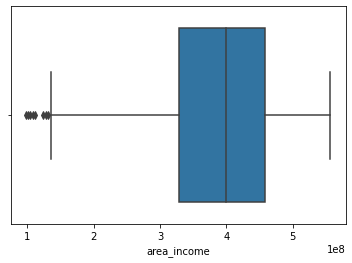

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x = df_clean['area_income'])

In [39]:
df_clean=df_clean[(df_clean['area_income']>=low_limit) & (df_clean['area_income']<=high_limit)]

<AxesSubplot:xlabel='area_income'>

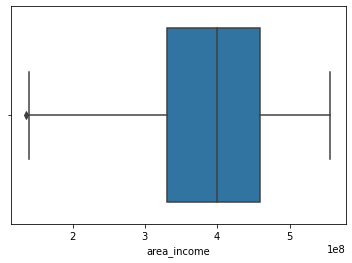

In [40]:
plt.figure(figsize=(6,4))
sns.boxplot(x = df_clean['area_income'])

Walau masih ada outlier namun sudah berkurang dari nilai awal sebelum dilakukan treatment dengan IQR

In [41]:
df_clean.isna().sum().sort_values()

daily_time_spent_on_site    0
age                         0
area_income                 0
daily_internet_usage        0
gender                      0
timestamp                   0
clicked_on_ad               0
city                        0
province                    0
category                    0
customer_age_group          0
tahun                       0
bulan                       0
pekan                       0
hari                        0
dtype: int64

### Feature Encoding

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   daily_time_spent_on_site  989 non-null    float64       
 1   age                       989 non-null    int64         
 2   area_income               989 non-null    float64       
 3   daily_internet_usage      989 non-null    float64       
 4   gender                    989 non-null    object        
 5   timestamp                 989 non-null    datetime64[ns]
 6   clicked_on_ad             989 non-null    object        
 7   city                      989 non-null    object        
 8   province                  989 non-null    object        
 9   category                  989 non-null    object        
 10  customer_age_group        989 non-null    object        
 11  tahun                     989 non-null    int64         
 12  bulan                 

Treatment:
1. Untuk feature gender & clicked on ads = Label Encoding
2. Untuk feature city, province, category, customer_age_group = OHE

In [43]:
mapping_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1
}
df_clean['gender']=df_clean['gender'].map(mapping_gender)

mapping_clicked = {
    'No' : 0,
    'Yes' : 1
}
df_clean['clicked_on_ad']=df_clean['clicked_on_ad'].map(mapping_clicked)


In [44]:
kota=pd.get_dummies(df_clean['city'], prefix='kota')
provinsi=pd.get_dummies(df_clean['province'], prefix='provinsi')
kategori=pd.get_dummies(df_clean['category'], prefix='category')
umur=pd.get_dummies(df_clean['customer_age_group'], prefix='golumur')

In [45]:
df_clean=pd.concat([df_clean,kota,provinsi,kategori,umur], axis=1)

In [46]:
#Mendrop column column yang sudah dilakukan treatment OHE
df_clean.drop(columns=['city','province','category','customer_age_group'], inplace=True)

In [47]:
#Mendrop column timestamp yang sudah diextract
df_clean.drop(columns=['timestamp'], inplace=True)

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   daily_time_spent_on_site                989 non-null    float64
 1   age                                     989 non-null    int64  
 2   area_income                             989 non-null    float64
 3   daily_internet_usage                    989 non-null    float64
 4   gender                                  989 non-null    int64  
 5   clicked_on_ad                           989 non-null    int64  
 6   tahun                                   989 non-null    int64  
 7   bulan                                   989 non-null    int64  
 8   pekan                                   989 non-null    int64  
 9   hari                                    989 non-null    int64  
 10  kota_Balikpapan                         989 non-null    uint8 

In [49]:
df_clean.isna().sum().sort_values()

daily_time_spent_on_site    0
kota_Surakarta              0
kota_Tangerang              0
kota_Tangerang Selatan      0
kota_Tasikmalaya            0
                           ..
kota_Jakarta Barat          0
kota_Depok                  0
kota_Denpasar               0
kota_Jakarta Utara          0
golumur_Youth (15-24)       0
Length: 69, dtype: int64

## **Modelling and Evaluation**

### Without Data Normalization

In [198]:
df_real=df_clean.copy() #without normalization

In [199]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   daily_time_spent_on_site                989 non-null    float64
 1   age                                     989 non-null    int64  
 2   area_income                             989 non-null    float64
 3   daily_internet_usage                    989 non-null    float64
 4   gender                                  989 non-null    int64  
 5   clicked_on_ad                           989 non-null    int64  
 6   tahun                                   989 non-null    int64  
 7   bulan                                   989 non-null    int64  
 8   pekan                                   989 non-null    int64  
 9   hari                                    989 non-null    int64  
 10  kota_Balikpapan                         989 non-null    uint8 

In [200]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV


In [201]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [202]:
def eval_classification(model, xtrain, ytrain, xtest, ytest):
    pred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print(key+':', model.get_params()[key])
        
def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form  
    cm_df = pd.DataFrame(cm,index=['Actually Not Clicked on Ads', 'Actually Clicked on Ads'],
                 columns=['Predicted Not Clicked on Ads', 'Predicted Clicked on Ads'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class');

In [203]:
x = df_real.drop(columns=['clicked_on_ad'], axis=1)
y = df_real['clicked_on_ad'] 
print(x.shape)
print(y.shape)

(989, 68)
(989,)


In [204]:
y.value_counts()

0    498
1    491
Name: clicked_on_ad, dtype: int64

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1000)

In [206]:
y_train.value_counts()

0    401
1    390
Name: clicked_on_ad, dtype: int64

In [207]:
y_test.value_counts()

1    101
0     97
Name: clicked_on_ad, dtype: int64

#### **Logistic Regression**

In [208]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [209]:
eval_classification(lr_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.49
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.75


In [210]:
print('Train score: ' + str(lr_model.score(x_train, y_train))) 
print('Test score:' + str(lr_model.score(x_test, y_test))) 

Train score: 0.506953223767383
Test score:0.4898989898989899


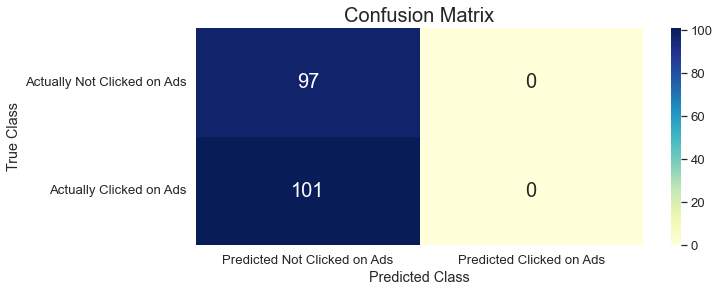

In [211]:
show_cmatrix(y_test, y_pred_lr)

In [212]:
recall_lr = recall_score(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
acc_lr_train = lr_model.score(x_train, y_train)

#### **KNN**

In [213]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

In [214]:
eval_classification(knn_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.71
Recall (Test Set): 0.55
F1-Score (Test Set): 0.62
AUC: 0.70


In [215]:
print('Train score: ' + str(knn_model.score(x_train, y_train))) 
print('Test score:' + str(knn_model.score(x_test, y_test))) 

Train score: 0.7509481668773704
Test score:0.6565656565656566


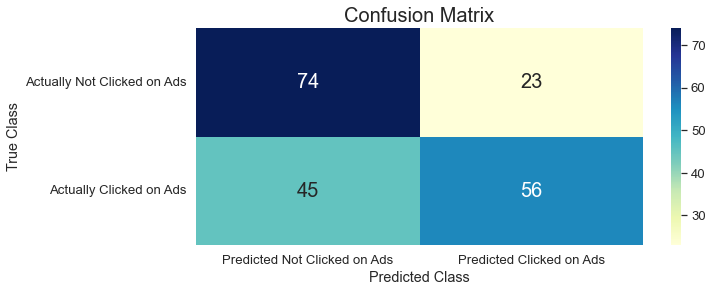

In [216]:
show_cmatrix(y_test, y_pred_knn)

In [217]:
recall_knn = recall_score(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
acc_knn_train = knn_model.score(x_train, y_train)

#### **Decision Tree**

In [218]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)

In [219]:
eval_classification(dt_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.93
Recall (Test Set): 0.87
F1-Score (Test Set): 0.90
AUC: 0.90


In [220]:
print('Train score: ' + str(dt_model.score(x_train, y_train))) #accuracy
print('Test score:' + str(dt_model.score(x_test, y_test))) #accuracy

Train score: 1.0
Test score:0.898989898989899


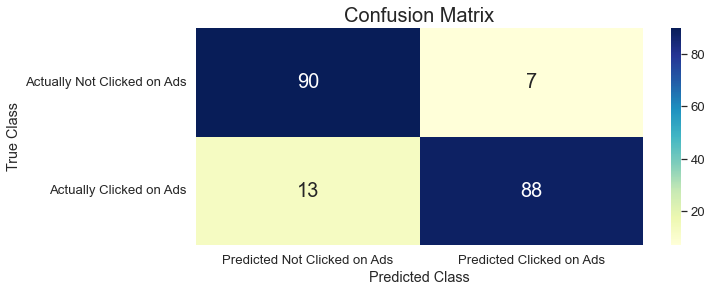

In [221]:
show_cmatrix(y_test, y_pred_dt)

In [222]:
recall_dt = recall_score(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
acc_dt_train = dt_model.score(x_train, y_train)

### **Model Evaluation without Normalization**

In [223]:
evaluation_summary = {
    'Log Res':[acc_lr, recall_lr, precision_lr, f1_lr],
    'KNN':[acc_knn, recall_knn, precision_knn, f1_knn],
    'Decision Tree':[acc_dt, recall_dt, precision_dt, f1_dt]
}

eva_sum = pd.DataFrame(data = evaluation_summary, index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
eva_sum

,Log Res,KNN,Decision Tree
Accuracy,0.489899,0.656566,0.898990
Recall,0.000000,0.554455,0.871287
Precision,0.000000,0.708861,0.926316
F1 Score,0.000000,0.622222,0.897959


In [224]:
evaluation_summary_train_test = {
    "Train" : [acc_lr_train, acc_knn_train, acc_dt_train],
    "Test": [acc_lr, acc_knn, acc_dt]
}

eva_sum_train_test = pd.DataFrame(data = evaluation_summary_train_test, index = ['Log Res','KNN', 'Decision Tree'])
eva_sum_train_test

,Train,Test
Log Res,0.506953,0.489899
KNN,0.750948,0.656566
Decision Tree,1.000000,0.898990


### With Data Normalization

In [225]:
df_real_norm=df_clean.copy()  #with normalization

In [226]:
df_real_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   daily_time_spent_on_site                989 non-null    float64
 1   age                                     989 non-null    int64  
 2   area_income                             989 non-null    float64
 3   daily_internet_usage                    989 non-null    float64
 4   gender                                  989 non-null    int64  
 5   clicked_on_ad                           989 non-null    int64  
 6   tahun                                   989 non-null    int64  
 7   bulan                                   989 non-null    int64  
 8   pekan                                   989 non-null    int64  
 9   hari                                    989 non-null    int64  
 10  kota_Balikpapan                         989 non-null    uint8 

In [227]:
x = df_real_norm.drop(columns=['clicked_on_ad'], axis=1)
y = df_real_norm['clicked_on_ad'] 
print(x.shape)
print(y.shape)

(989, 68)
(989,)


In [228]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV


In [229]:
for col in df_real_norm.columns:
        df_real_norm[col] = MinMaxScaler().fit_transform(df_real_norm[col].values.reshape(len(df_real_norm), 1))

In [230]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [231]:
def eval_classification(model, xtrain, ytrain, xtest, ytest):
    pred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print(key+':', model.get_params()[key])
        
def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    # Putting the matrix a dataframe form  
    cm_df = pd.DataFrame(cm, index=['Actually Not Clicked on Ads', 'Actually Clicked on Ads'],
                 columns=['Predicted Not Clicked on Ads', 'Predicted Clicked on Ads'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class');

In [232]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### **Logistic Regression**

In [233]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [234]:
eval_classification(lr_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.48
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.69


In [235]:
print('Train score: ' + str(lr_model.score(x_train, y_train))) 
print('Test score:' + str(lr_model.score(x_test, y_test))) 

Train score: 0.5082174462705437
Test score:0.48484848484848486


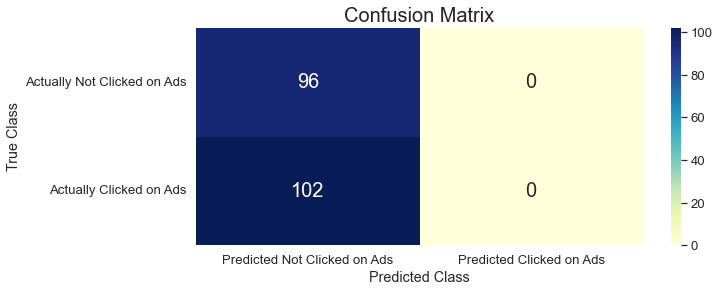

In [236]:
show_cmatrix(y_test, y_pred_lr)

In [237]:
recall_lr = recall_score(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
acc_lr_train = lr_model.score(x_train, y_train)

#### **KNN**

In [185]:
pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [238]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

In [239]:
eval_classification(knn_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.60
Precision (Test Set): 0.64
Recall (Test Set): 0.50
F1-Score (Test Set): 0.56
AUC: 0.61


In [240]:
print('Train score: ' + str(knn_model.score(x_train, y_train))) 
print('Test score:' + str(knn_model.score(x_test, y_test))) 

Train score: 0.7686472819216182
Test score:0.5959595959595959


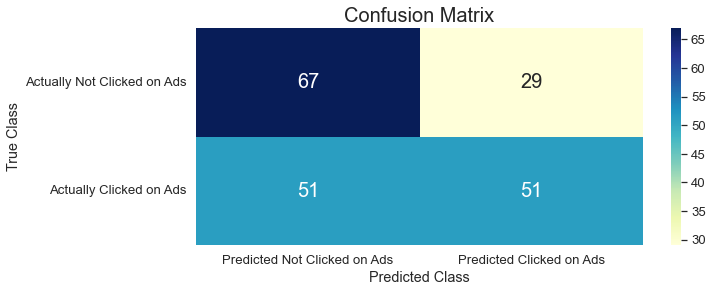

In [241]:
show_cmatrix(y_test, y_pred_knn)

In [242]:
recall_knn = recall_score(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
acc_knn_train = knn_model.score(x_train, y_train)

#### **Decision tree**

In [243]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)

In [244]:
eval_classification(dt_model, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.92
Recall (Test Set): 0.94
F1-Score (Test Set): 0.93
AUC: 0.93


In [245]:
print('Train score: ' + str(dt_model.score(x_train, y_train))) #accuracy
print('Test score:' + str(dt_model.score(x_test, y_test))) #accuracy

Train score: 1.0
Test score:0.9292929292929293


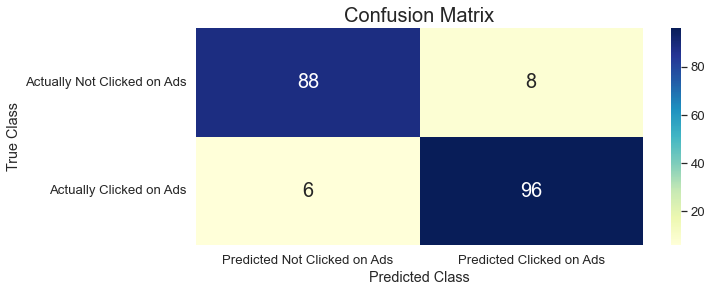

In [246]:
show_cmatrix(y_test, y_pred_dt)

In [247]:
recall_dt = recall_score(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
acc_dt_train = dt_model.score(x_train, y_train)

### **Model Evaluation with Normalization**

In [248]:
evaluation_summary = {
    'Log Res':[acc_lr, recall_lr, precision_lr, f1_lr],
    'KNN':[acc_knn, recall_knn, precision_knn, f1_knn],
    'Decision Tree':[acc_dt, recall_dt, precision_dt, f1_dt]
}

eva_sum = pd.DataFrame(data = evaluation_summary, index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
eva_sum

,Log Res,KNN,Decision Tree
Accuracy,0.484848,0.59596,0.929293
Recall,0.000000,0.50000,0.941176
Precision,0.000000,0.63750,0.923077
F1 Score,0.000000,0.56044,0.932039


In [249]:
evaluation_summary_train_test = {
    "Train" : [acc_lr_train, acc_knn_train, acc_dt_train],
    "Test": [acc_lr, acc_knn, acc_dt]
}

eva_sum_train_test = pd.DataFrame(data = evaluation_summary_train_test, index = ['Log Res','KNN', 'Decision Tree'])
eva_sum_train_test

,Train,Test
Log Res,0.508217,0.484848
KNN,0.768647,0.595960
Decision Tree,1.000000,0.929293


## **Feature Importance**

In [250]:
##Using the best model accuracy score (Decision Tree with normalizatipn data)
dt_norm = DecisionTreeClassifier()

dtf=dt_norm.fit(x_train, y_train)
dtf.feature_importances_
len(dtf.feature_importances_)

df_real_norm.reset_index(drop=True, inplace=True)
df_feature_importance = pd.DataFrame({'Features_Name':x.columns, 'Features_Importances':dtf.feature_importances_}
                                    ).sort_values('Features_Importances', ascending=False).reset_index(drop=True)

In [251]:
df_feature_importance

,Features_Name,Features_Importances
0,daily_internet_usage,0.716088
1,daily_time_spent_on_site,0.148941
2,area_income,0.046612
3,age,0.038066
4,pekan,0.008491
...,...,...
63,kota_Serang,0.000000
64,kota_Surakarta,0.000000
65,kota_Tangerang,0.000000
66,kota_Tangerang Selatan,0.000000


<BarContainer object of 10 artists>

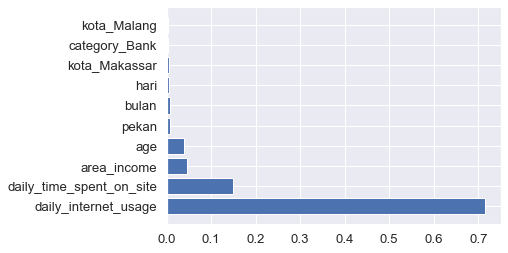

In [252]:
plt.barh(df_feature_importance.Features_Name.head(10),df_feature_importance.Features_Importances.head(10))